# Hello PyCaret Regression

In [1]:
from pycaret.regression import RegressionExperiment
from pycaret.datasets import get_data

import os

data = get_data('insurance')
print(data.shape)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


(1338, 7)


In [2]:
reg_experiment = RegressionExperiment()
reg_experiment.setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [3]:
best = reg_experiment.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,1.3340
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,1.3720
catboost,CatBoost Regressor,2899.3783,25762701.9552,5057.5721,0.8163,0.4815,0.3522,1.9620
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,1.6480
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,1.3830
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,1.2780
xgboost,Extreme Gradient Boosting,3443.6091,32824626.4000,5711.2140,0.7626,0.6224,0.4469,1.4240
lr,Linear Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,2.1480
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,1.2050
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,1.2260


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [4]:
print(best)

GradientBoostingRegressor(random_state=123)


In [5]:
reg_experiment.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

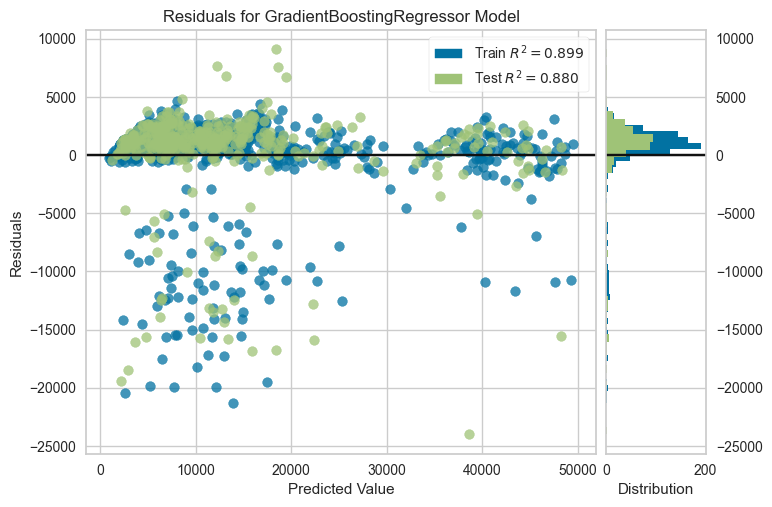

In [6]:
reg_experiment.plot_model(best, plot = 'residuals')

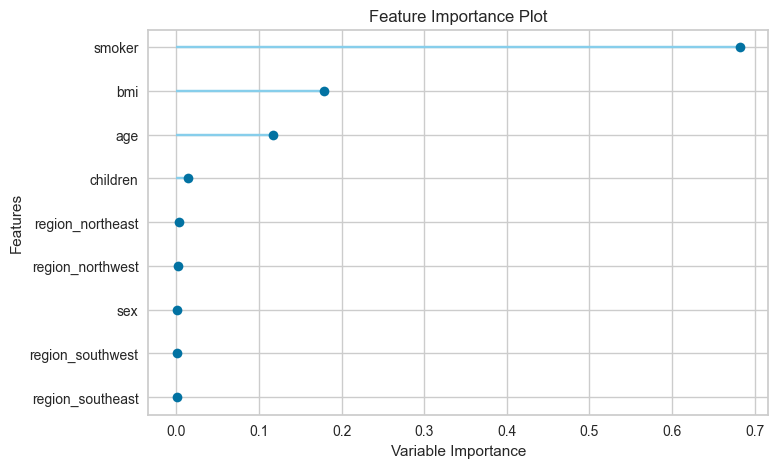

In [7]:
reg_experiment.plot_model(best, plot = 'feature')

In [8]:
reg_experiment.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2392.5661,17148355.3169,4141.0573,0.8800,0.3928,0.2875


,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,10681.513104
319,32,male,37.334999,1,no,northeast,4667.607422,8043.453463
314,27,female,31.400000,0,yes,southwest,34838.871094,36153.097686
150,35,male,24.129999,1,no,northwest,5125.215820,7435.516853
336,60,male,25.740000,0,no,southeast,12142.578125,14676.544334
...,...,...,...,...,...,...,...,...
1221,40,male,24.969999,2,no,southeast,6593.508301,9264.152792
973,19,female,40.500000,0,no,southwest,1759.338013,2604.919960
1250,24,male,29.830000,0,yes,northeast,18648.421875,18639.490954
887,36,female,30.020000,0,no,northwest,5272.175781,5117.185514


In [9]:
predictions = reg_experiment.predict_model(best, data=data)
predictions['diff'] = predictions['prediction_label'] - predictions['charges']
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2219.8743,15663377.0613,3957.6985,0.8931,0.3650,0.2634


,age,sex,bmi,children,smoker,region,charges,prediction_label,diff
0,19,female,27.900000,0,yes,southwest,16884.923828,18464.334448,1579.410620
1,18,male,33.770000,1,no,southeast,1725.552246,4020.345384,2294.793137
2,28,male,33.000000,3,no,southeast,4449.461914,6555.388388,2105.926474
3,33,male,22.705000,0,no,northwest,21984.470703,9627.045725,-12357.424978
4,32,male,28.879999,0,no,northwest,3866.855225,3325.531292,-541.323933


In [13]:
# save model
save_path = os.path.join(os.getenv('HOME'), 'models', 'pycaret', 'hello_regression')
reg_experiment.save_model(best, save_path)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype('O'),
                                

In [14]:
# load back the model
loaded_model = reg_experiment.load_model(save_path)
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype(

### Operations [Create API]

In [11]:
reg_experiment.create_api(best, 'insurance_gradient_boosting_reg_model')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python insurance_gradient_boosting_reg_model.py


In [16]:
!python insurance_gradient_boosting_reg_model.py

^C


### Operations [Create App]

In [15]:
reg_experiment.create_app(best, {})

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


### Operations [Create Dockerfile]

In [19]:
reg_experiment.create_docker(best)

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


### Operations [Create Code]

In [25]:
reg_experiment.convert_model(best, 'java')

NotImplementedError: Model 'sklearn_GradientBoostingRegressor' is not supported